## MNIST(흑백 손글씨 숫자 이미지 인식) 문제 모델

In [ ]:
import keras
import numpy as np

# 1. 데이터 준비하기
(train_x, train_y), (test_x, test_y) = keras.datasets.mnist.load_data()

print("훈련용 데이터 :", train_x.shape, train_y.shape)
print("평가용 데이터 :", test_x.shape, test_y.shape)

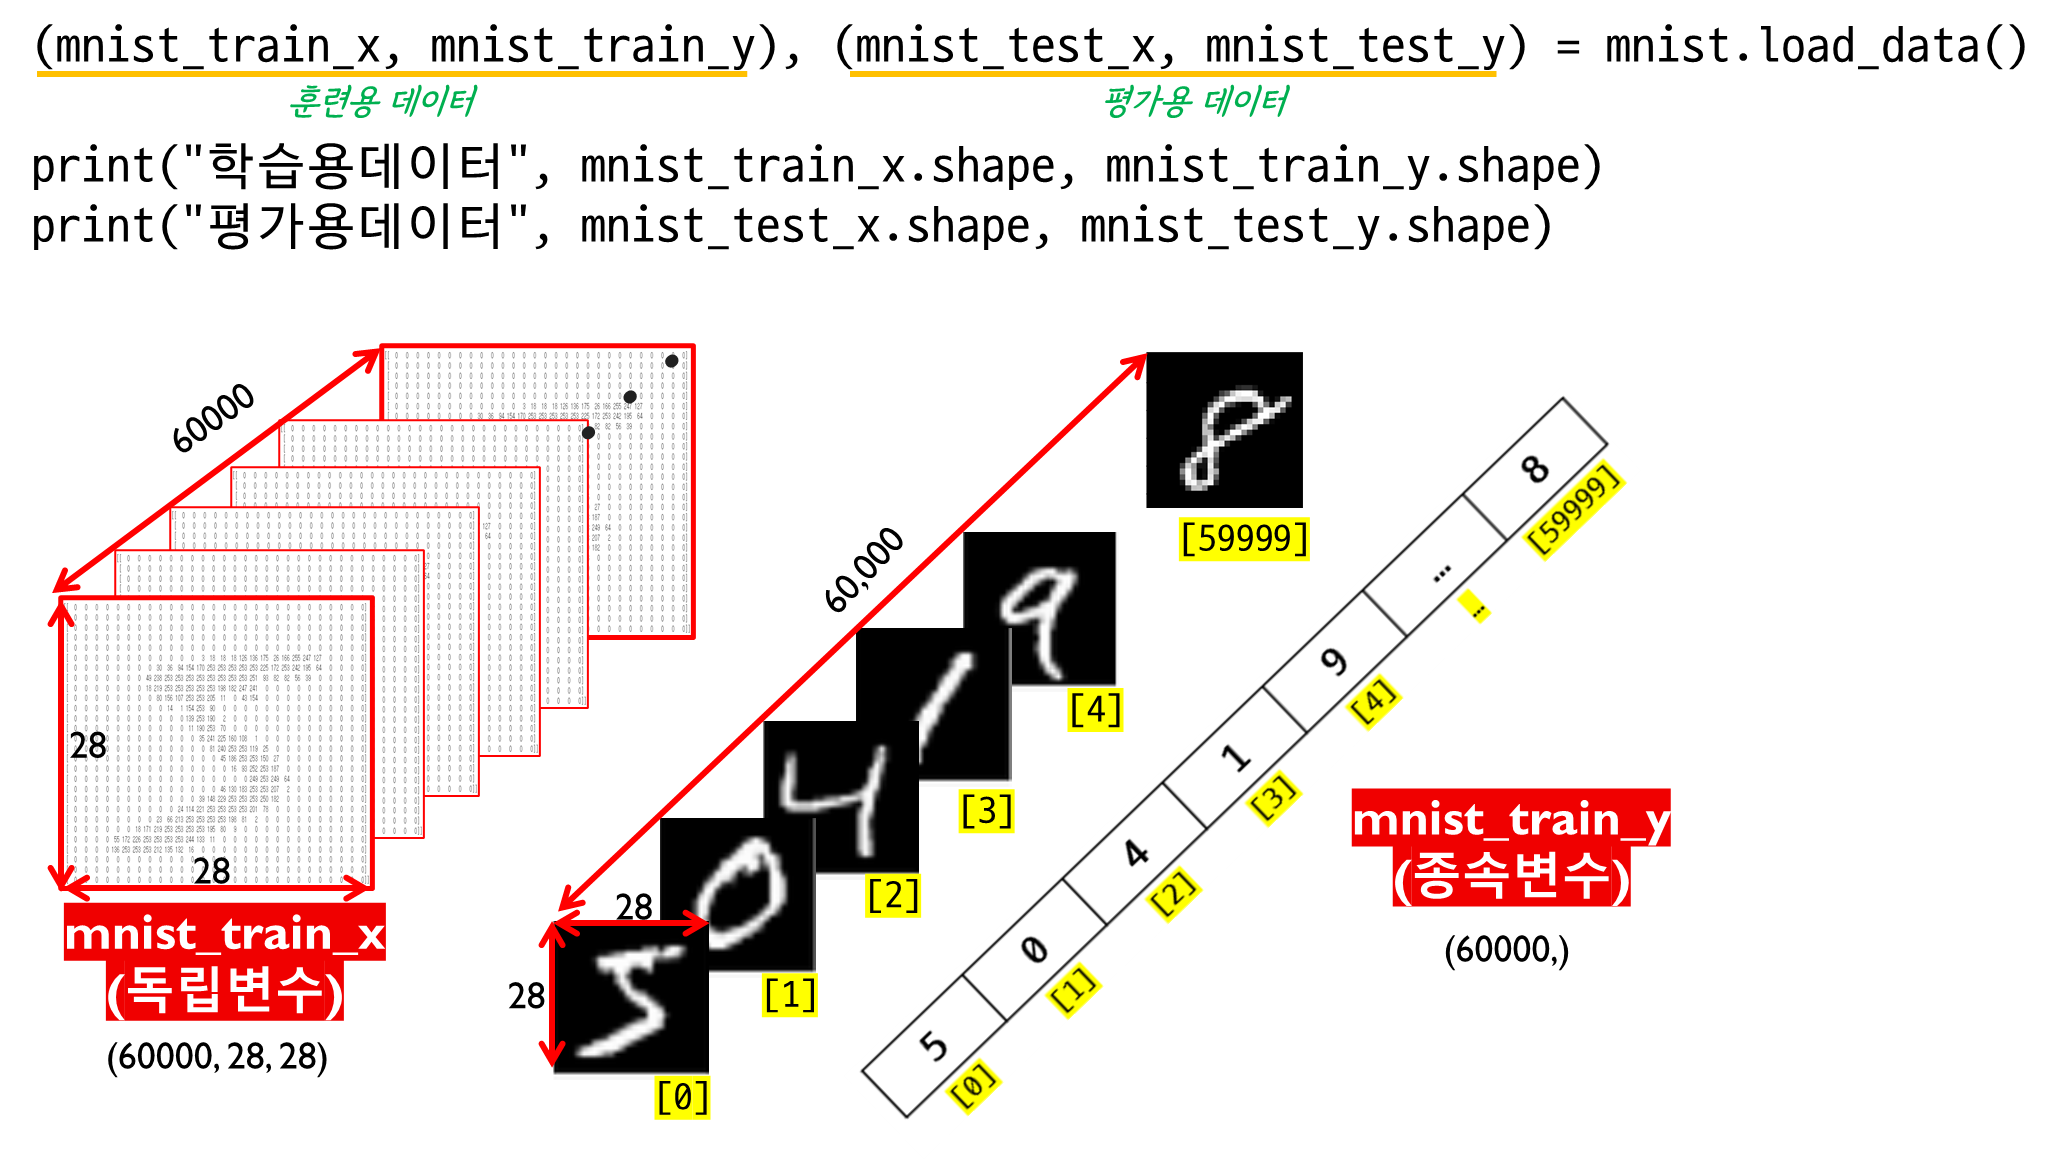

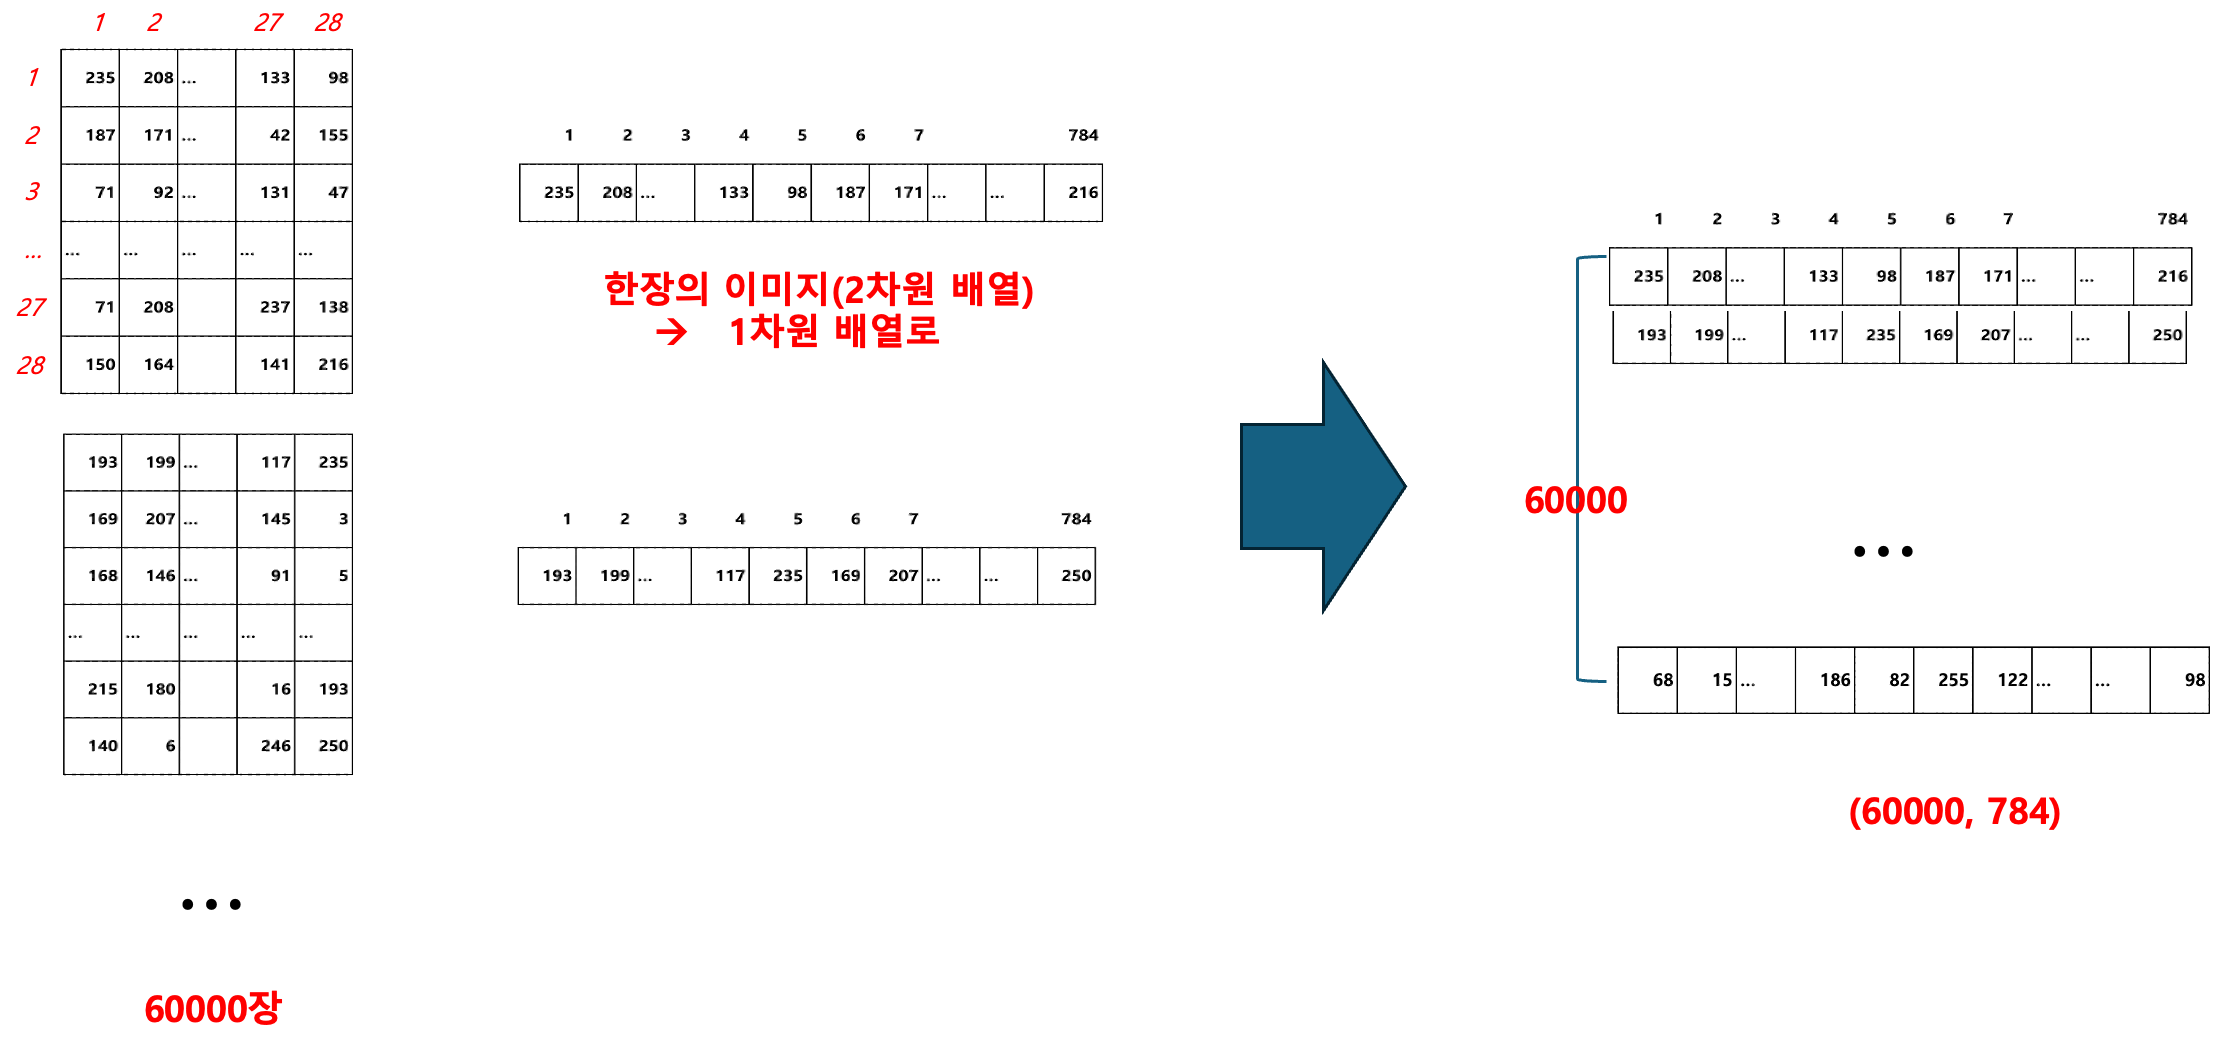

### 모델 개발 코드 완성하기

In [ ]:
# 0. 필요한 모듈 불러오기
import keras
import numpy as np

# 1. 데이터 준비하기
(train_x, train_y), (test_x, test_y) = keras.datasets.mnist.load_data()

# 1-1. 훈련용 데이터 처리
sample, row, col = train_x.shape                      # (60000, 28, 28)
train_x = np.reshape(train_x, (sample, ???))      # (60000, 28, 28) --> (60000, 784) 로 변환
# train_x 정규화

# 1-2. 평가용 데이터 처리
sample, row, col = test_x.shape                       # (10000, 28, 28)
test_x = np.reshape(test_x, (sample, ???))        # (10000, 28, 28) --> (10000, 784) 로 변환
# test_x 정규화

########################################################
#train_y = keras.utils.to_categorical(train_y)         # Label(정답)이 정수면, one-hot 인코딩 하지 않아도 됨.
########################################################

# 2. 모델 설계
model = keras.Sequential()
model.add(keras.layers.Input(shape=(???,)))
model.add(keras.layers.Dense(32, activation='???'))
model.add(keras.layers.Dense(64, activation='???'))
model.add(keras.layers.Dense(32, activation='???'))
model.add(keras.layers.Dense(??, activation='???'))

# 3. 모델의 학습을 설정한다.
# 정답이 정수이고, one-hot 인코딩을 하지 않을 때, 손실함수는?
model.compile(loss='손실함수?', optimizer='adam', metrics=['accuracy'])

# 4. 모델을 학습시킨다.(시각화를 위해 학습이력을 hist 변수에 저장)
# 훈련 데이터의 20%를 검증데이터로 만들어 보고 싶다.
hist = model.fit(train_x, train_y, epochs=20, 검증데이터를 20%로?)

### 모델의 요약 정보 보기

In [ ]:
# 모델 학습에 대한 요약 정보

???

### 모델 예측해 보기(평가용 데이터)

In [ ]:
# 예측해 보기 : 평가용 데이터중 처음 10개 손글씨 이미지 예측해 보기(평가용 데이터는 Unseened 데이터)

#np.set_printoptions(precision=0, suppress=True)  # numpy데이터의 소수점 자리수 조정

prediction = ???
prediction

In [ ]:
# 정답확인하기 : 평가용 데이터중 처음 10개 손글씨 이미지의 정답은?

test_y[0:4]

In [ ]:
# 전체 데이터 예측

prediction = model.predict(test_x)  # 모델이 test_x에 대해 예측한 결과를 반환

prediction

In [ ]:
# 전체 데이터의 정답



In [ ]:
# 시간 남으면 하기...
# 테스트 데이터에 대해 모델을 평가하고, loss(손실)과 accuracy(정확도)를 출력

model.evaluate(test_x, test_y)

# ex) a, b = [10, 20]

# loss, accuracy = model.evaluate(test_x, test_y)
# print(loss)
# print(accuracy)

## 모델이 예측한 것 중 틀린 것을 찾아보기

#### 간단한 예시데이터로 살펴보기
> np.argmax() : 최대값의 인덱스 찾기

> np.where() : 조건에 맞는 것의 인덱스 반환

In [ ]:
# 만약, 3개의 샘플 데이터에 대해서, predict 배열처럼 예측했다면,,,

import numpy as np

            # class   개  양   닭   소   말
            # class   0    1    2    3    4
prediction = np.array([[0.2, 0.3, 0.2, 0.0, 0.5],
                       [0.1, 0.2, 0.6, 0.0, 0.1],
                       [0.9, 0.0, 0.0, 0.0, 0.1],
                       [0.1, 0.2, 0.2, 0.5, 0.0]])

# argmax()함수? 가장 큰 값의 인덱스 번호를 반환
#               클래스별 예측값의 최대 확률 인덱스를 추출하기 위해 사용
prediction_class = np.argmax(prediction, axis=1)

print(prediction_class) # [4, 2, 0, 3] --> [말, 닭, 개, 소]

[4 2 0 3]


In [ ]:
# 만약 정답은 [말4, 양1, 개0, 닭2] 라면,,,
# 즉 [4, 1, 0, 2]

animal_test_y = np.array([4, 1, 0, 2])

print(prediction_class)  # 예측 결과 [말, 닭, 개, 소]
print(animal_test_y)     # 정답      [말, 양, 개, 닭]

[4 2 0 3]
[4 1 0 2]


In [ ]:
# 틀린 예측 찾아보기?

# 오답 인덱스 찾기(각각의 위치와 비교해서 같지 않은 것 찾기)
#                          [4 2 0 3]      [4 1 0 2]
incorrect = np.where(prediction_class != animal_test_y)
incorrect

(array([1, 3]),)

### 실제 데이터에서 오답 찾기

In [ ]:
# 실제 데이터에서 찾아보기

prediction = model.predict(test_x)            # 모델이 예측한 결과
prediction

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
# 제일 큰 확률의 인덱스 찾기

prediction_class = np.argmax(prediction, axis=1)
prediction_class

In [ ]:
# 실제 정답과 비교해서 다른 것 찾기

incorrect = np.where(prediction_class != test_y)
incorrect

In [ ]:
# 몇개가 틀렸는지 알아보기??

????????????

In [ ]:
# 왜 그림 출력이 안되고 에러가 발생할까?
import matplotlib.pyplot as plt

plt.imshow(test_x[0])
plt.show()

In [ ]:
# 이미지셋 3차원 배열(10000, 28, 28) --> 1차원 배열(10000, 784)로 바꿔 주었음
# test_x = np.reshape(test_x, (10000, 784))

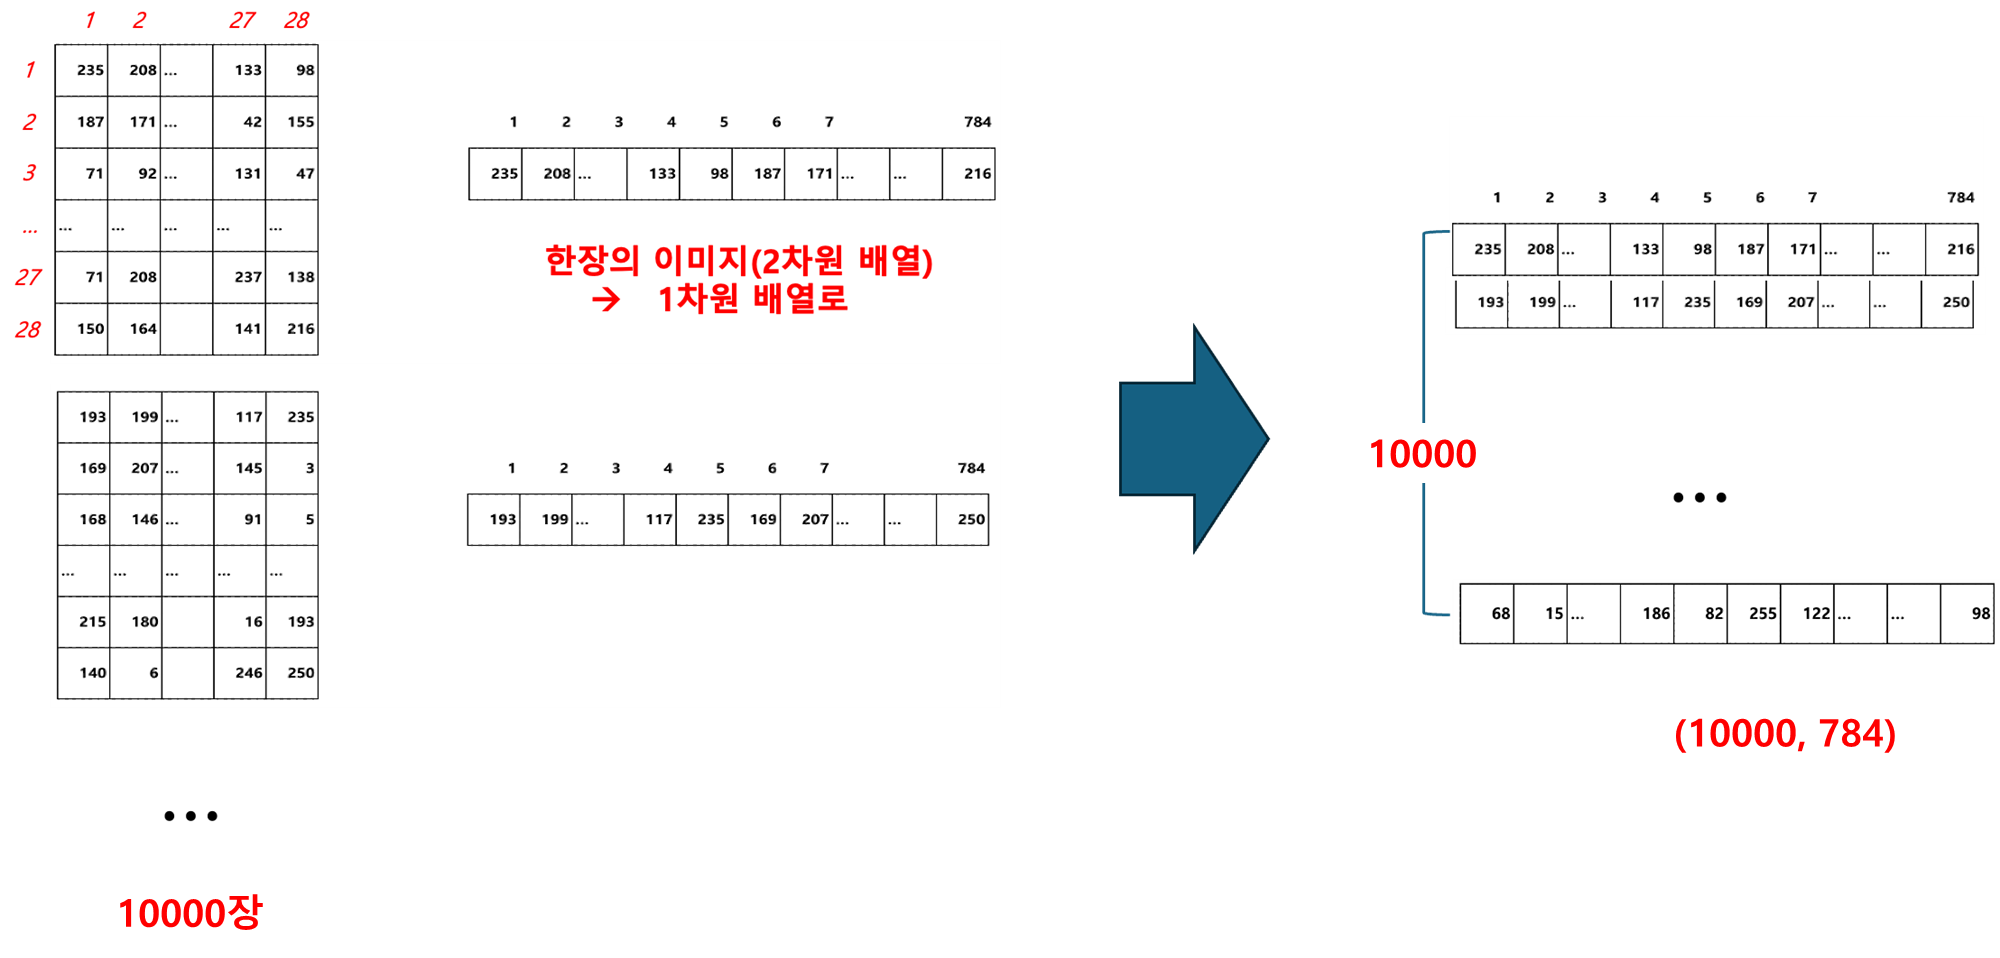

In [ ]:
# 2차원 배열로 변환 (10000, 784) --> (10000, 28, 28)

test_xx = np.reshape(test_x, ??????????)

In [ ]:
# 틀린 샘플 살펴보기
import matplotlib.pyplot as plt

plt.imshow(test_xx[0], cmap='gray')
plt.show()

print("예측한 값 :", prediction_class[0])
print("실제 정답 :", test_y[0])

In [ ]:
# 모든 틀린 샘플의 번호?
incorrect

In [ ]:
# 틀린 모든 것을 위처럼 확인해 보기
import matplotlib.pyplot as plt

for i ???:
    plt.imshow(???)
    plt.show()

    print("예측한 값 :", prediction_class[i])
    print("실제 정답 :", test_y[i])

## 학습이력 시각화

In [ ]:
# 학습이력 저장
# hist = model.fit(train_x, train_y, epochs=20, validation_split=0.2)

print(hist.history)

print(hist.history['accuracy'])
print(hist.history['val_accuracy'])

print(hist.history['loss'])
print(hist.history['val_loss'])

In [ ]:
# 학습이력 시각화

import matplotlib.pyplot as plt

# 훈련 정확도(accuracy) 그래프
plt.subplot(121)
plt.plot(???)
plt.plot(???)
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'val'], loc='lower right')

# 훈련 손실(loss) 그래프
plt.subplot(122)
plt.plot(???)
plt.plot(???)
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train', 'val'], loc='upper right')

plt.tight_layout()
plt.show()

## cifar10 컬로 이미지 분류 모델 만들어 보기

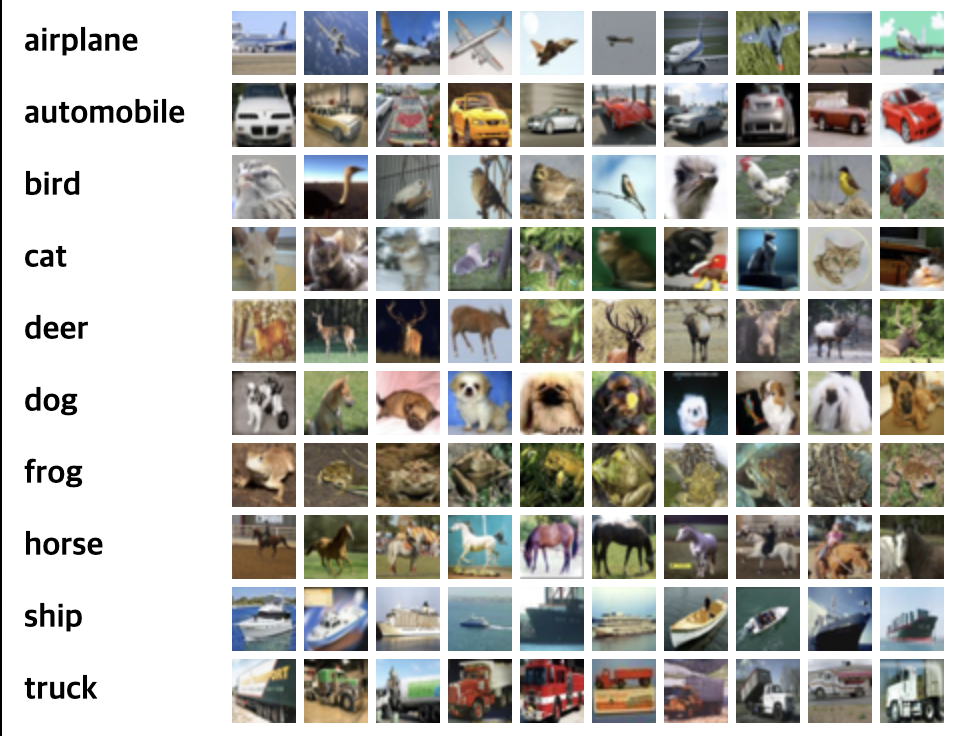

In [ ]:
import keras
import numpy as np

# 1. 데이터 준비하기
(train_x, train_y), (test_x, test_y) = keras.datasets.cifar10.load_data()

sample, row, col, ch = train_x.shape                     # (50000, 32, 32, 3)
train_x = np.reshape(train_x, (sample, ??????))          # (50000, 32, 32, 3) --> (50000, ???) 로 변환
train_x = train_x / 255


# 2. 모델 설계
model = keras.Sequential()
model.add(keras.layers.Input(shape=(?????,)))
model.add(keras.layers.Dense(???, activation='relu'))
model.add(keras.layers.Dense(???, activation='relu'))
model.add(keras.layers.Dense(???, activation='relu'))
model.add(keras.layers.Dense(???, activation='???'))

# 3. 모델의 학습을 설정한다.
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 4. 모델을 학습시킨다.
hist = model.fit(train_x, train_y, epochs=50)